In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import subprocess
import numpy as np
from Bio import SeqIO

import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, LSTM, SimpleRNN, GRU

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [2]:
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, LSTM, SimpleRNN, GRU, Bidirectional

model = Sequential()
model.add(Embedding(944238, 10))
model.add(Bidirectional(LSTM(10)))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.load_weights("LSTM.weights.best.hdf5")
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 10)          9442380   
_________________________________________________________________
bidirectional (Bidirectional (None, 20)                1680      
_________________________________________________________________
dense (Dense)                (None, 10)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 9,444,281
Trainable params: 9,444,281
Non-trainable params: 0
_________________________________________________________________


In [3]:
map_model = model.layers[0].get_weights()[0]
map_model.shape

(944238, 10)

In [27]:
W = np.dot(map_model.T, map_model)
W.shape

L, V = np.linalg.eig(W)
print("autovalori: \n", L/sum(L), "\nAutovettori: \n", V )

autovalori: 
 [0.27870253 0.21042985 0.15572998 0.14445594 0.04411012 0.02869747
 0.03696882 0.03594508 0.03175059 0.03320959] 
Autovettori: 
 [[ 0.4464641   0.19432317 -0.13712794  0.29316998  0.16484569 -0.6126427
  -0.37204108 -0.2788976  -0.15916109 -0.11882647]
 [ 0.16881746 -0.49673173 -0.20850663  0.30150414 -0.09324569 -0.12480275
  -0.13485447  0.44596103  0.08296018  0.5849433 ]
 [-0.3784218  -0.20318872  0.37598804 -0.25797993 -0.37627727 -0.655534
   0.02017     0.09537061 -0.15821253 -0.04180399]
 [ 0.30662343 -0.4139389   0.30279642  0.0626773  -0.36235863  0.33576575
  -0.44848618 -0.01232923 -0.06333824 -0.43551868]
 [ 0.06735311 -0.2994005  -0.33188605 -0.563089   -0.10163982 -0.01732138
  -0.16422668 -0.57102853  0.23721427  0.24219836]
 [-0.4650296  -0.16985382 -0.24640359  0.11065666  0.17119065  0.17547241
  -0.27852967 -0.15705325 -0.7176964   0.06714194]
 [-0.22743313  0.14105526 -0.46001944  0.4205859  -0.66631037 -0.00596029
   0.13517304 -0.17468351  0.1472321

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
map_model = scaler.fit_transform(map_model)

In [32]:
map_model.shape

(944238, 10)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
emb_pca = pca.fit_transform(map_model)
emb_pca.shape

(944238, 5)

In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0, perplexity = 30, n_iter=250, verbose=1)
emb_tsne = tsne.fit_transform(emb_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 944238 samples in 1.075s...
[t-SNE] Computed neighbors for 944238 samples in 25.211s...
[t-SNE] Computed conditional probabilities for sample 1000 / 944238
[t-SNE] Computed conditional probabilities for sample 2000 / 944238
[t-SNE] Computed conditional probabilities for sample 3000 / 944238
[t-SNE] Computed conditional probabilities for sample 4000 / 944238
[t-SNE] Computed conditional probabilities for sample 5000 / 944238
[t-SNE] Computed conditional probabilities for sample 6000 / 944238
[t-SNE] Computed conditional probabilities for sample 7000 / 944238
[t-SNE] Computed conditional probabilities for sample 8000 / 944238
[t-SNE] Computed conditional probabilities for sample 9000 / 944238
[t-SNE] Computed conditional probabilities for sample 10000 / 944238
[t-SNE] Computed conditional probabilities for sample 11000 / 944238
[t-SNE] Computed conditional probabilities for sample 12000 / 944238
[t-SNE] Computed conditional probab

[t-SNE] Computed conditional probabilities for sample 118000 / 944238
[t-SNE] Computed conditional probabilities for sample 119000 / 944238
[t-SNE] Computed conditional probabilities for sample 120000 / 944238
[t-SNE] Computed conditional probabilities for sample 121000 / 944238
[t-SNE] Computed conditional probabilities for sample 122000 / 944238
[t-SNE] Computed conditional probabilities for sample 123000 / 944238
[t-SNE] Computed conditional probabilities for sample 124000 / 944238
[t-SNE] Computed conditional probabilities for sample 125000 / 944238
[t-SNE] Computed conditional probabilities for sample 126000 / 944238
[t-SNE] Computed conditional probabilities for sample 127000 / 944238
[t-SNE] Computed conditional probabilities for sample 128000 / 944238
[t-SNE] Computed conditional probabilities for sample 129000 / 944238
[t-SNE] Computed conditional probabilities for sample 130000 / 944238
[t-SNE] Computed conditional probabilities for sample 131000 / 944238
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 238000 / 944238
[t-SNE] Computed conditional probabilities for sample 239000 / 944238
[t-SNE] Computed conditional probabilities for sample 240000 / 944238
[t-SNE] Computed conditional probabilities for sample 241000 / 944238
[t-SNE] Computed conditional probabilities for sample 242000 / 944238
[t-SNE] Computed conditional probabilities for sample 243000 / 944238
[t-SNE] Computed conditional probabilities for sample 244000 / 944238
[t-SNE] Computed conditional probabilities for sample 245000 / 944238
[t-SNE] Computed conditional probabilities for sample 246000 / 944238
[t-SNE] Computed conditional probabilities for sample 247000 / 944238
[t-SNE] Computed conditional probabilities for sample 248000 / 944238
[t-SNE] Computed conditional probabilities for sample 249000 / 944238
[t-SNE] Computed conditional probabilities for sample 250000 / 944238
[t-SNE] Computed conditional probabilities for sample 251000 / 944238
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 358000 / 944238
[t-SNE] Computed conditional probabilities for sample 359000 / 944238
[t-SNE] Computed conditional probabilities for sample 360000 / 944238
[t-SNE] Computed conditional probabilities for sample 361000 / 944238
[t-SNE] Computed conditional probabilities for sample 362000 / 944238
[t-SNE] Computed conditional probabilities for sample 363000 / 944238
[t-SNE] Computed conditional probabilities for sample 364000 / 944238
[t-SNE] Computed conditional probabilities for sample 365000 / 944238
[t-SNE] Computed conditional probabilities for sample 366000 / 944238
[t-SNE] Computed conditional probabilities for sample 367000 / 944238
[t-SNE] Computed conditional probabilities for sample 368000 / 944238
[t-SNE] Computed conditional probabilities for sample 369000 / 944238
[t-SNE] Computed conditional probabilities for sample 370000 / 944238
[t-SNE] Computed conditional probabilities for sample 371000 / 944238
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 493000 / 944238
[t-SNE] Computed conditional probabilities for sample 494000 / 944238
[t-SNE] Computed conditional probabilities for sample 495000 / 944238
[t-SNE] Computed conditional probabilities for sample 496000 / 944238
[t-SNE] Computed conditional probabilities for sample 497000 / 944238
[t-SNE] Computed conditional probabilities for sample 498000 / 944238
[t-SNE] Computed conditional probabilities for sample 499000 / 944238
[t-SNE] Computed conditional probabilities for sample 500000 / 944238
[t-SNE] Computed conditional probabilities for sample 501000 / 944238
[t-SNE] Computed conditional probabilities for sample 502000 / 944238
[t-SNE] Computed conditional probabilities for sample 503000 / 944238
[t-SNE] Computed conditional probabilities for sample 504000 / 944238
[t-SNE] Computed conditional probabilities for sample 505000 / 944238
[t-SNE] Computed conditional probabilities for sample 506000 / 944238
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 615000 / 944238
[t-SNE] Computed conditional probabilities for sample 616000 / 944238
[t-SNE] Computed conditional probabilities for sample 617000 / 944238
[t-SNE] Computed conditional probabilities for sample 618000 / 944238
[t-SNE] Computed conditional probabilities for sample 619000 / 944238
[t-SNE] Computed conditional probabilities for sample 620000 / 944238
[t-SNE] Computed conditional probabilities for sample 621000 / 944238
[t-SNE] Computed conditional probabilities for sample 622000 / 944238
[t-SNE] Computed conditional probabilities for sample 623000 / 944238
[t-SNE] Computed conditional probabilities for sample 624000 / 944238
[t-SNE] Computed conditional probabilities for sample 625000 / 944238
[t-SNE] Computed conditional probabilities for sample 626000 / 944238
[t-SNE] Computed conditional probabilities for sample 627000 / 944238
[t-SNE] Computed conditional probabilities for sample 628000 / 944238
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 736000 / 944238
[t-SNE] Computed conditional probabilities for sample 737000 / 944238
[t-SNE] Computed conditional probabilities for sample 738000 / 944238
[t-SNE] Computed conditional probabilities for sample 739000 / 944238
[t-SNE] Computed conditional probabilities for sample 740000 / 944238
[t-SNE] Computed conditional probabilities for sample 741000 / 944238
[t-SNE] Computed conditional probabilities for sample 742000 / 944238
[t-SNE] Computed conditional probabilities for sample 743000 / 944238
[t-SNE] Computed conditional probabilities for sample 744000 / 944238
[t-SNE] Computed conditional probabilities for sample 745000 / 944238
[t-SNE] Computed conditional probabilities for sample 746000 / 944238
[t-SNE] Computed conditional probabilities for sample 747000 / 944238
[t-SNE] Computed conditional probabilities for sample 748000 / 944238
[t-SNE] Computed conditional probabilities for sample 749000 / 944238
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 858000 / 944238
[t-SNE] Computed conditional probabilities for sample 859000 / 944238
[t-SNE] Computed conditional probabilities for sample 860000 / 944238
[t-SNE] Computed conditional probabilities for sample 861000 / 944238
[t-SNE] Computed conditional probabilities for sample 862000 / 944238
[t-SNE] Computed conditional probabilities for sample 863000 / 944238
[t-SNE] Computed conditional probabilities for sample 864000 / 944238
[t-SNE] Computed conditional probabilities for sample 865000 / 944238
[t-SNE] Computed conditional probabilities for sample 866000 / 944238
[t-SNE] Computed conditional probabilities for sample 867000 / 944238
[t-SNE] Computed conditional probabilities for sample 868000 / 944238
[t-SNE] Computed conditional probabilities for sample 869000 / 944238
[t-SNE] Computed conditional probabilities for sample 870000 / 944238
[t-SNE] Computed conditional probabilities for sample 871000 / 944238
[t-SNE] Computed con

In [11]:
intr_file = '../data/hg19_intr_clean.fa'
depl_file = '../data/hg19_depl_clean.fa'

e = 0
intr_seqs = []
depl_seqs = []
for intr, depl in zip(SeqIO.parse(intr_file, 'fasta'), SeqIO.parse(depl_file, 'fasta')):
    
    #cutoff = 200
    #my_intr_seq = str(intr.seq)[0:cutoff]
    #my_depl_seq = str(depl.seq)[0:cutoff]
    #intr_seqs.append(my_intr_seq)
    #depl_seqs.append(my_depl_seq)
    
    step = 200; jump = 1; a = 0; b = step; n_jumps = 5
    for j in range(n_jumps):
        s_intr = str(intr.seq)[a:b]
        s_depl = str(depl.seq)[a:b]
        intr_seqs.append(s_intr)
        depl_seqs.append(s_depl)
        a = a + jump
        b = a + step
    
    e = e + 1
    if e%20000 == 0:
        print('Finished ' + str(e) + ' entries')
        
def getKmers(sequence, size):
    return [sequence[x:x+size].upper() for x in range(len(sequence) - size + 1)]

kmer = 10
intr_texts = [' '.join(getKmers(i, kmer)) for i in intr_seqs]
depl_texts = [' '.join(getKmers(i, kmer)) for i in depl_seqs]

Finished 20000 entries
Finished 40000 entries
Finished 60000 entries


In [12]:
merge_texts = intr_texts + depl_texts
len(merge_texts)

733640

In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(merge_texts)
#X = tokenizer.texts_to_matrix(merge_texts, mode = 'freq')

encoded_docs = tokenizer.texts_to_sequences(merge_texts)
max_length = max([len(s.split()) for s in merge_texts])
X = pad_sequences(encoded_docs, maxlen = max_length, padding = 'post')

print(X)
print('\n')
print(X.shape)

[[153634 568397 382160 ... 635443 506832 658088]
 [568397 382160 380712 ... 506832 658088 654350]
 [382160 380712 323461 ... 658088 654350 503434]
 ...
 [  1173    900    397 ...  64841  93299 115195]
 [   900    397    537 ...  93299 115195 135311]
 [   397    537   1117 ... 115195 135311  63747]]


(733640, 191)


In [16]:
pred = ["TTTTTTTTTT", "GTGTGTGTGT", "TGTGTGTGTG", "GTTTGTTTGT", "TTTGTTTGTT", "TTGTTTGTTT", "TGTTTGTTTG", 
        "TTCTCCTGCC", "CCTCCACCTC", "CTCCACCTCC", "AAAAATCAAA", "CTCTCTCTCT", "TTTCTCTTGC", "GGCTAATTTT",
        "CCCAGGCTGG", "CCAGGCTGGA", "AGGCTGGAGT", "CTCACTGCAA"]

pred = [i.lower() for i in pred]

print(pred)

['tttttttttt', 'gtgtgtgtgt', 'tgtgtgtgtg', 'gtttgtttgt', 'tttgtttgtt', 'ttgtttgttt', 'tgtttgtttg', 'ttctcctgcc', 'cctccacctc', 'ctccacctcc', 'aaaaatcaaa', 'ctctctctct', 'tttctcttgc', 'ggctaatttt', 'cccaggctgg', 'ccaggctgga', 'aggctggagt', 'ctcactgcaa']


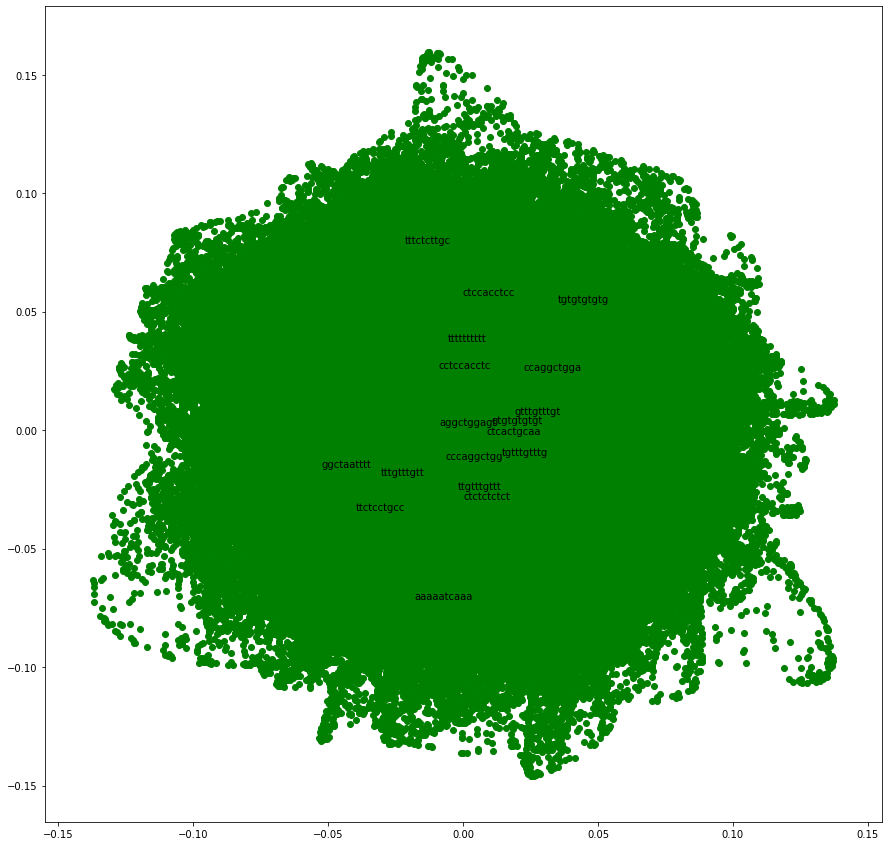

In [17]:
plt.figure(figsize = (15,15))

plt.scatter(emb_tsne[:,0],emb_tsne[:,1], color = 'green')
for i,j in tokenizer.word_index.items():
    if(i in pred):
        plt.annotate(i, (emb_tsne[j,0], emb_tsne[j,1]))
plt.show()

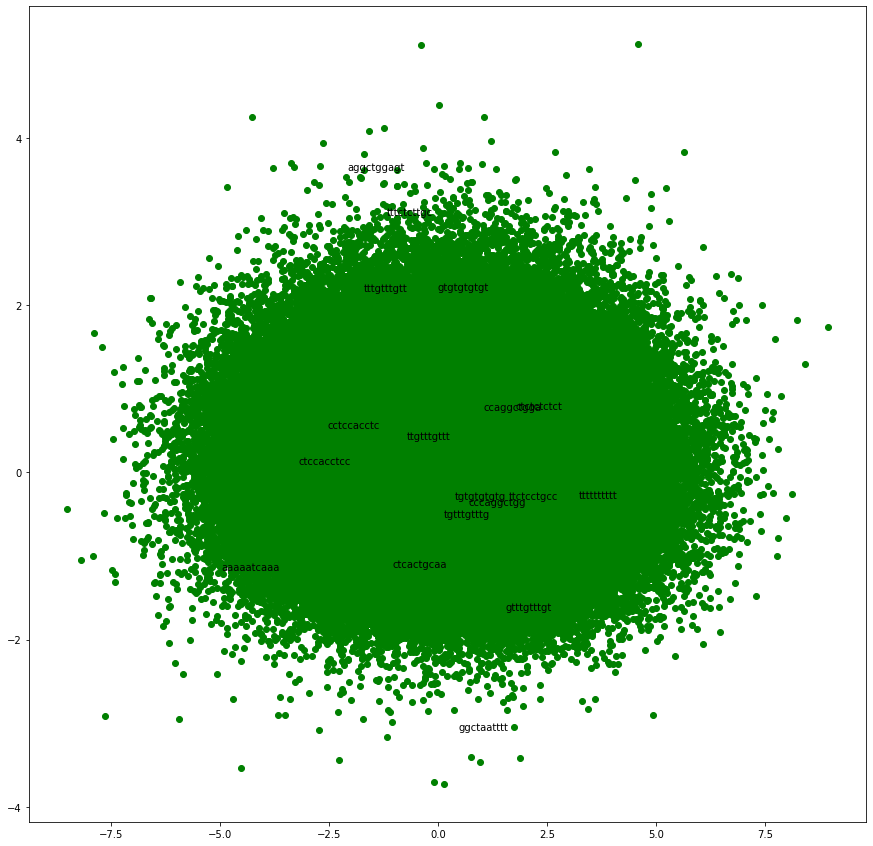

In [23]:
plt.figure(figsize = (15,15))

plt.scatter(emb_pca[:,0],emb_pca[:,1], color = 'green')
for i,j in tokenizer.word_index.items():
    if(i in pred):
        plt.annotate(i, (emb_pca[j,0], emb_pca[j,1]))
plt.show()

In [33]:
"""from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA

transformer = KernelPCA(n_components=2, kernel='linear')
X_transformed = transformer.fit_transform(map_model)
X_transformed.shape"""

"from sklearn.datasets import load_digits\nfrom sklearn.decomposition import KernelPCA\n\ntransformer = KernelPCA(n_components=2, kernel='linear')\nX_transformed = transformer.fit_transform(map_model)\nX_transformed.shape"

In [ ]:
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap

embedding = Isomap(n_components=2)
X_transformed = embedding.fit_transform(map_model)
X_transformed.shape

In [ ]:
plt.figure(figsize = (15,15))

plt.scatter(X_transformed[:,0],X_transformed[:,1], color = 'green')
for i,j in tokenizer.word_index.items():
    if(i in pred):
        plt.annotate(i, (X_transformed[j,0], X_transformed[j,1]))
plt.show()